#  Analysis for Customer Feedback

## Loading Data

In [1]:
import pandas as pd

In [2]:
orderreviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orderitems_df = pd.read_csv("data/olist_order_items_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
categoryname_df = pd.read_csv("data/product_category_name_translation.csv")

In [3]:
Reviews = pd.merge(orderreviews_df, orderitems_df[['order_id', 'product_id']])
Reviews = pd.merge(Reviews, products_df[['product_id', 'product_category_name']])
Reviews = pd.merge(Reviews, categoryname_df)
del Reviews['product_category_name']
Reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,fd25ab760bfbba13c198fa3b4f1a0cd3,sports_leisure
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,3880d25d502b15b1de6fddc42ad1d67a,sports_leisure
...,...,...,...,...,...,...,...,...,...
110745,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship
110746,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,eacb104882d39ffb53140b1d1860a7c3,arts_and_craftmanship
110747,a6aa76a7e7d8d5cc16f841cfb1619dbc,1c3f752b9a4d09bf1e016439a427d5f8,5,NaN,NaN,2018-08-22 00:00:00,2018-08-23 00:52:09,56a1efb30499b4dffd45c8d655199b11,arts_and_craftmanship
110748,82ec4a1c6f0134f607033e23431ee298,2c4ada2e75c2ad41dd93cebb5df5f023,4,NaN,Envio muito rápido. Recomendo.,2017-02-15 00:00:00,2017-02-16 02:54:35,6c7a0a349ad11817745e3ad58abd5c79,security_and_services


In [4]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   review_id                      110750 non-null  object
 1   order_id                       110750 non-null  object
 2   review_score                   110750 non-null  int64 
 3   review_comment_title           13347 non-null   object
 4   review_comment_message         46923 non-null   object
 5   review_creation_date           110750 non-null  object
 6   review_answer_timestamp        110750 non-null  object
 7   product_id                     110750 non-null  object
 8   product_category_name_english  110750 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.6+ MB


In [5]:
Reviews.dropna(inplace=True)
Reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name_english
7,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,a76bb75d78ce6aa4a5202051b4f88a83,sports_leisure
26,707879ba994360a7805bdda512738e6d,d08bba6d656adbdc54eaf30b29532e89,1,Entrega faltando,Comprei dois produtos na loja só veio um. É no...,2018-07-21 00:00:00,2018-07-24 07:31:37,6dae4e6bc334685708571a48aa41d437,sports_leisure
27,61cd6b47a7c54cf93806138ec393260c,b0fac27c81315d7201a0ca455f58304d,4,Recebi o produto no prazo,Entregue no prazo.,2018-08-15 00:00:00,2018-08-16 02:43:55,6dae4e6bc334685708571a48aa41d437,sports_leisure
40,430a1e8f51ceca3105e85821f78bde79,608423eb49f078b0c2095dbdbe03c210,1,Não recomendo,O produto chegou sem problemas. Mas ele não é ...,2018-04-25 00:00:00,2018-04-29 15:09:41,45b280868bcc8124d9309f459a42eeaf,sports_leisure
48,6f96de0b0526fd16fcdc0e372aef7402,147941b96e61a2e7c02be8bf27b4cca1,5,Excelente,"Produto de ótima qualidade, entrega rápida.",2018-06-21 00:00:00,2018-06-21 22:52:17,5113c9a5037013b0a750444df6dec60f,sports_leisure
...,...,...,...,...,...,...,...,...,...
110739,012902a4690846e0d3e1cb3a950a1bd0,cc9760bf7b5d5b74c4d1eb1ab6405b50,1,Produto ainda não chegou,Recebi um pacote com apenas um item do que com...,2018-07-24 00:00:00,2018-08-16 15:39:00,54b391a91c3b1a1e22af86434155834d,arts_and_craftmanship
110742,a6a6d2f97b28e8aca22046635855fe63,edcf1e1eeb52381be9388c90152be52d,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30,6bb18295cc019bf3b6dc7c773411d530,arts_and_craftmanship
110743,1416283e258fc5cd87d9d326148cad5e,99496f27b38d83724e8dea944a320b44,5,Otimo,"Muito rapida a entrega ,perfeito",2018-07-26 00:00:00,2018-07-26 21:31:57,189d6b9a380642d0ee2245277cc9b2f2,arts_and_craftmanship
110745,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship


## NLP Sentiment Analysis for Reviews

In [6]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from deep_translator import GoogleTranslator
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [8]:
# Translate messages smaples into English
# Extract Text Data
# text_data = Reviews['review_comment_message'].astype(str).sample(n=1500, random_state=42)

# def translator(sentence):
#     if sentence.isnumeric():
#         return sentence
#     max_chars = 5000
#     return GoogleTranslator(source='pt', target='en').translate(sentence)

# text_data_english = []
# for text in text_data:
#     text_data_english.append(translator(text))
# text_data_english

In [ ]:
# None in text_data_english

In [ ]:
# text_data_english = list(filter(lambda x: x is not None, text_data_english))
# len(text_data_english)

In [ ]:
# Convert list to string
# text_data_english_string = '\n'.join(text_data_english)
# Write string to file
# with open('data/text_data_english.txt', 'w',  encoding='utf-8') as f:
#     f.write(text_data_english_string)

In [10]:
with open('data/text_data_english.txt', 'r',  encoding='utf-8') as f:
    text_data_english_string = [line.rstrip() for line in f]
text_data_english_string

['excellent',
 'I liked to buy yes it arrived on time',
 'Customer respect, quality, satisfaction. Happy Customer!!!',
 "I bought 2 products, however only 1 has been delivered so far. I can't wait for the contact of the store to get it right!",
 'Liar, I paid for 3 mugs, only one came and it was broken. Lack of respect',
 'Delivery on time. Product as advertised.',
 'Everything is OK',
 'I was wrong not to pay attention that it was Eau de Toillet, but the smell is wonderful for those who love sweet perfume',
 'did not arrive did not arrive',
 'I bought the product and I had to go to the post office to collect it',
 '',
 'but I paid for it by delivering it to my house so I think I was wronged.',
 '',
 'by the store I recommend the product price.',
 'Great quality product and super fast delivery. #AquiÉGaloPorra',
 'I will definitely buy again.',
 'Missing 1 network arrived, only 1 network arrived',
 'Received very quickly, perfect product.',
 "A good knife, but it just didn't come sharp

In [11]:
# NLP Analysis with TextBlob
text_data = pd.Series(text_data_english)
polarity = text_data.apply(lambda x: TextBlob(x).sentiment.polarity)
polarity

0     1.000000
1     0.600000
2     1.000000
3     0.152381
4    -0.200000
5     0.000000
6     0.500000
7     0.337500
8     0.000000
9     0.000000
10    0.444444
11    0.000000
12   -0.100000
13    1.000000
14    0.700000
15    0.900000
16    0.000000
17    0.800000
18    0.000000
19    0.700000
20    0.000000
21    0.000000
22    0.800000
23    0.000000
24    1.000000
25    0.000000
26    0.000000
27    0.474653
28    0.305556
29    0.000000
30    0.037500
31    0.666667
32    0.800000
33    0.152381
34    0.200000
35    0.700000
36    0.000000
37    0.562500
38    0.750000
39   -0.050000
40    0.000000
41    0.152137
42    1.000000
43    0.224359
44   -0.125000
45    0.850000
46   -0.138889
47    0.530000
48    1.000000
49    0.350000
50   -0.141667
51    0.910000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.650000
57    0.250000
58    0.416667
dtype: float64

In [12]:
subjectivity = text_data.apply(lambda x: TextBlob(x).sentiment.subjectivity)
subjectivity

0     1.000000
1     0.800000
2     1.000000
3     0.845238
4     0.700000
5     0.000000
6     0.500000
7     0.787500
8     0.000000
9     0.000000
10    0.672222
11    0.500000
12    0.525000
13    1.000000
14    0.600000
15    0.875000
16    0.500000
17    0.750000
18    0.000000
19    0.600000
20    0.000000
21    0.000000
22    0.750000
23    0.000000
24    1.000000
25    0.000000
26    0.000000
27    0.622222
28    0.833333
29    0.000000
30    0.650000
31    0.666667
32    0.750000
33    0.845238
34    0.600000
35    0.600000
36    0.000000
37    0.765000
38    0.900000
39    0.400000
40    0.000000
41    0.345299
42    0.780000
43    0.367521
44    0.375000
45    1.000000
46    0.611111
47    0.670000
48    1.000000
49    0.550000
50    0.525000
51    0.780000
52    0.000000
53    1.000000
54    0.000000
55    0.000000
56    1.000000
57    0.300000
58    0.833333
dtype: float64

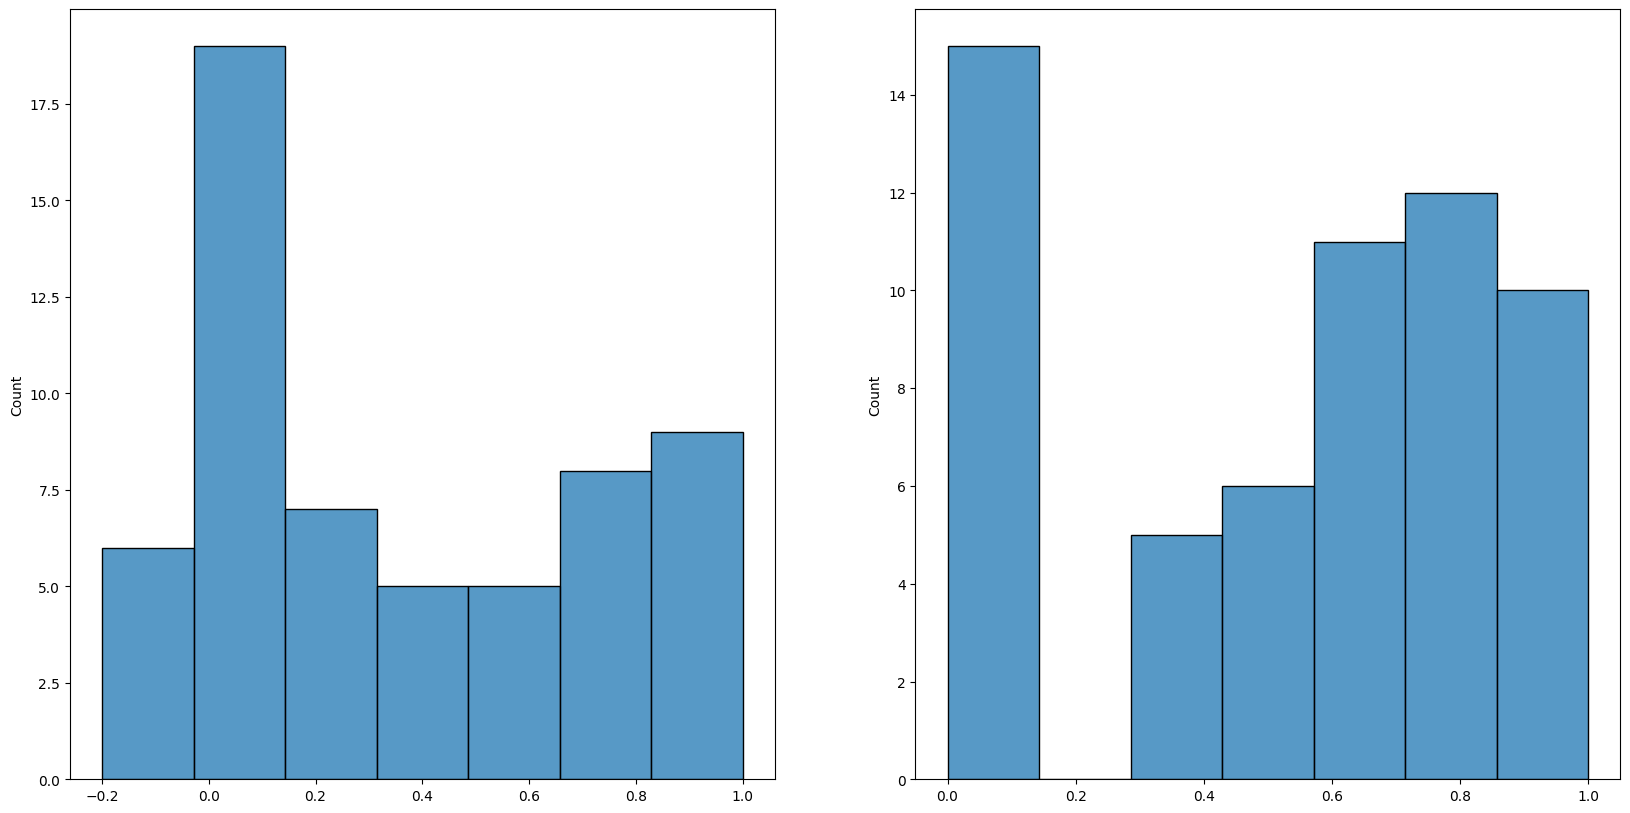

In [13]:
# Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(polarity, ax=axs[0])
sns.histplot(subjectivity, ax=axs[1])
plt.show()

In [14]:
# Create text corpus from list of review messages
text_corpus = ' '.join(text_data_english)

# Use TextBlob to remove stop words
blob = TextBlob(text_corpus)
clean_text = ' '.join([word for word in blob.words if word.lower() not in STOPWORDS])
clean_text

"excellent liked buy yes arrived time Customer respect quality satisfaction Happy Customer bought 2 products 1 delivered far ca n't wait contact store right Liar paid 3 mugs one came broken Lack respect Delivery time Product advertised Everything OK wrong pay attention Eau de Toillet smell wonderful love sweet perfume arrive arrive bought product go post office collect paid delivering house think wronged store recommend product price Great quality product super fast delivery AquiÉGaloPorra will definitely buy Missing 1 network arrived 1 network arrived Received quickly perfect product good knife n't come sharpened great store correct product delivered time excellent Congratulations received product earlier advertised product great arrived estimated time recommend product seller thought good delivered well deadline 'm waiting helmet replaced purchase still stuck post office know 's store 's fault something must done need equipment work n't arrived great bought one day received next day 

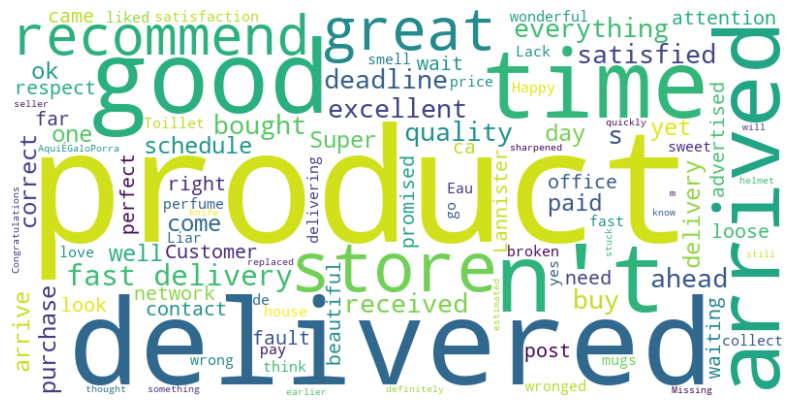

In [15]:
# Create WordCloud object
wc = WordCloud(width=800, height=400, max_words=100, background_color='white')

# Generate word cloud from cleaned text
wordcloud = wc.generate(clean_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

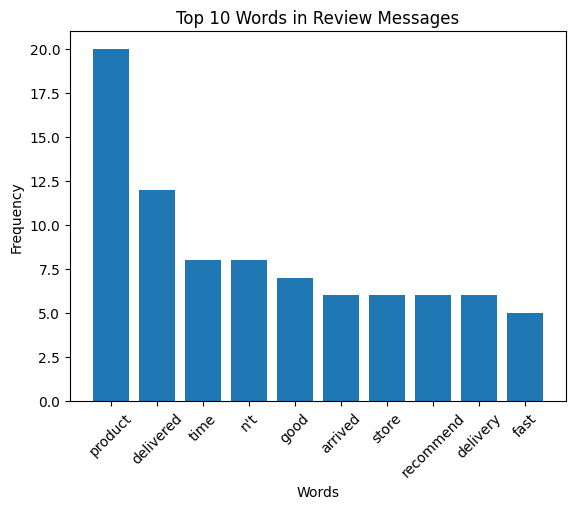

In [16]:
# Get top 10 most common words
top_words = Counter(clean_text.split()).most_common(10)

# Split top_words into words and counts lists
words, counts = [word[0] for word in top_words], [word[1] for word in top_words]

# Create bar chart
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Review Messages')
plt.xticks(rotation=45)
plt.show()

## Feedback Analysis

In [17]:
Reviews.product_category_name_english.unique()

array(['sports_leisure', 'computers_accessories', 'garden_tools',
       'bed_bath_table', 'toys', 'home_confort', 'small_appliances',
       'health_beauty', 'pet_shop', 'cool_stuff', 'electronics', 'baby',
       'luggage_accessories', 'housewares', 'watches_gifts', 'auto',
       'telephony', 'fashion_bags_accessories', 'perfumery',
       'furniture_decor', 'home_appliances_2', 'food_drink',
       'musical_instruments', 'stationery', 'books_imported',
       'office_furniture', 'books_general_interest',
       'construction_tools_construction', 'books_technical',
       'construction_tools_safety', 'art', 'home_appliances', 'computers',
       'christmas_supplies', 'audio', 'industry_commerce_and_business',
       'furniture_living_room', 'consoles_games', 'market_place',
       'drinks', 'kitchen_dining_laundry_garden_furniture', 'music',
       'furniture_bedroom', 'signaling_and_security', 'home_construction',
       'food', 'small_appliances_home_oven_and_coffee',
       'air_

In [18]:
# Create category labels
category_map = {
    'bed_bath_table': 'Home & Décor',
    'home_confort': 'Home & Décor',
    'housewares': 'Home & Décor',
    'furniture_decor': 'Home & Décor',
    'home_appliances_2': 'Home & Décor',
    'home_appliances': 'Home & Décor',
    'home_construction': 'Home & Décor',
    'construction_tools_construction': 'Home & Décor',
    'construction_tools_safety': 'Home & Décor',
    'construction_tools_lights': 'Home & Décor',
    'construction_tools_tools': 'Home & Décor',
    'costruction_tools_garden': 'Home & Décor',
    'costruction_tools_tools': 'Home & Décor',
    'kitchen_dining_laundry_garden_furniture': 'Home & Décor',
    'furniture_bedroom': 'Home & Décor',
    'home_comfort_2': 'Home & Décor',
    'furniture_living_room': 'Home & Décor',
    'air_conditioning': 'Home & Décor',
    'small_appliances': 'Home & Décor',
    'small_appliances_home_oven_and_coffee': 'Home & Décor',
    'fixed_telephony': 'Electronics & Computers',
    'computers': 'Electronics & Computers',
    'electronics': 'Electronics & Computers',
    'computers_accessories': 'Electronics & Computers',
    'telephony': 'Electronics & Computers',
    'audio': 'Electronics & Computers',
    'consoles_games': 'Electronics & Computers',
    'tablets_printing_image': 'Electronics & Computers',
    'fashion_bags_accessories': 'Fashion & Accessories',
    'fashion_underwear_beach': 'Fashion & Accessories',
    'fashion_male_clothing': 'Fashion & Accessories',
    'fashion_shoes': 'Fashion & Accessories',
    'fashion_childrens_clothes': 'Fashion & Accessories',
    'luggage_accessories': 'Fashion & Accessories',
    'health_beauty': 'Beauty & Personal Care',
    'perfumery': 'Beauty & Personal Care',
    'diapers_and_hygiene': 'Beauty & Personal Care',
    'food_drink': 'Food & Beverage',
    'drinks': 'Food & Beverage',
    'food': 'Food & Beverage',
    'agro_industry_and_commerce': 'Sports & Outdoor',
    'garden_tools': 'Sports & Outdoor',
    'auto': 'Sports & Outdoor',
    'sports_leisure': 'Sports & Outdoor',
    'toys': 'Toys & Games',
    'christmas_supplies': 'Toys & Games',
    'party_supplies': 'Toys & Games',
    'watches_gifts': 'Toys & Games',
    'stationery': 'Office & School Supplies',
    'books_imported': 'Office & School Supplies',
    'office_furniture': 'Office & School Supplies',
    'books_general_interest': 'Office & School Supplies',
    'books_technical': 'Office & School Supplies',
    'industry_commerce_and_business': 'Office & School Supplies',
    'art': 'Art& Music',
    'arts_and_craftmanship': 'Art& Music',
    'music': 'Art& Music',
    'cds_dvds_musicals': 'Art& Music',
    'musical_instruments': 'Art& Music',
    'cine_photo': 'Art& Music',    
    'pet_shop': 'Others',
    'cool_stuff': 'Others',
    'signaling_and_security': 'Others',
    'market_place': 'Others',
    'dvds_blu_ray': 'Others',
    'flowers': 'Others',
    'baby': 'Others',
}

# Map the product_category_name_english values to their corresponding category name
Reviews['category_label'] = Reviews['product_category_name_english'].map(category_map)
Reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name_english,category_label
7,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,a76bb75d78ce6aa4a5202051b4f88a83,sports_leisure,Sports & Outdoor
26,707879ba994360a7805bdda512738e6d,d08bba6d656adbdc54eaf30b29532e89,1,Entrega faltando,Comprei dois produtos na loja só veio um. É no...,2018-07-21 00:00:00,2018-07-24 07:31:37,6dae4e6bc334685708571a48aa41d437,sports_leisure,Sports & Outdoor
27,61cd6b47a7c54cf93806138ec393260c,b0fac27c81315d7201a0ca455f58304d,4,Recebi o produto no prazo,Entregue no prazo.,2018-08-15 00:00:00,2018-08-16 02:43:55,6dae4e6bc334685708571a48aa41d437,sports_leisure,Sports & Outdoor
40,430a1e8f51ceca3105e85821f78bde79,608423eb49f078b0c2095dbdbe03c210,1,Não recomendo,O produto chegou sem problemas. Mas ele não é ...,2018-04-25 00:00:00,2018-04-29 15:09:41,45b280868bcc8124d9309f459a42eeaf,sports_leisure,Sports & Outdoor
48,6f96de0b0526fd16fcdc0e372aef7402,147941b96e61a2e7c02be8bf27b4cca1,5,Excelente,"Produto de ótima qualidade, entrega rápida.",2018-06-21 00:00:00,2018-06-21 22:52:17,5113c9a5037013b0a750444df6dec60f,sports_leisure,Sports & Outdoor
...,...,...,...,...,...,...,...,...,...,...
110739,012902a4690846e0d3e1cb3a950a1bd0,cc9760bf7b5d5b74c4d1eb1ab6405b50,1,Produto ainda não chegou,Recebi um pacote com apenas um item do que com...,2018-07-24 00:00:00,2018-08-16 15:39:00,54b391a91c3b1a1e22af86434155834d,arts_and_craftmanship,Art& Music
110742,a6a6d2f97b28e8aca22046635855fe63,edcf1e1eeb52381be9388c90152be52d,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30,6bb18295cc019bf3b6dc7c773411d530,arts_and_craftmanship,Art& Music
110743,1416283e258fc5cd87d9d326148cad5e,99496f27b38d83724e8dea944a320b44,5,Otimo,"Muito rapida a entrega ,perfeito",2018-07-26 00:00:00,2018-07-26 21:31:57,189d6b9a380642d0ee2245277cc9b2f2,arts_and_craftmanship,Art& Music
110745,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship,Art& Music


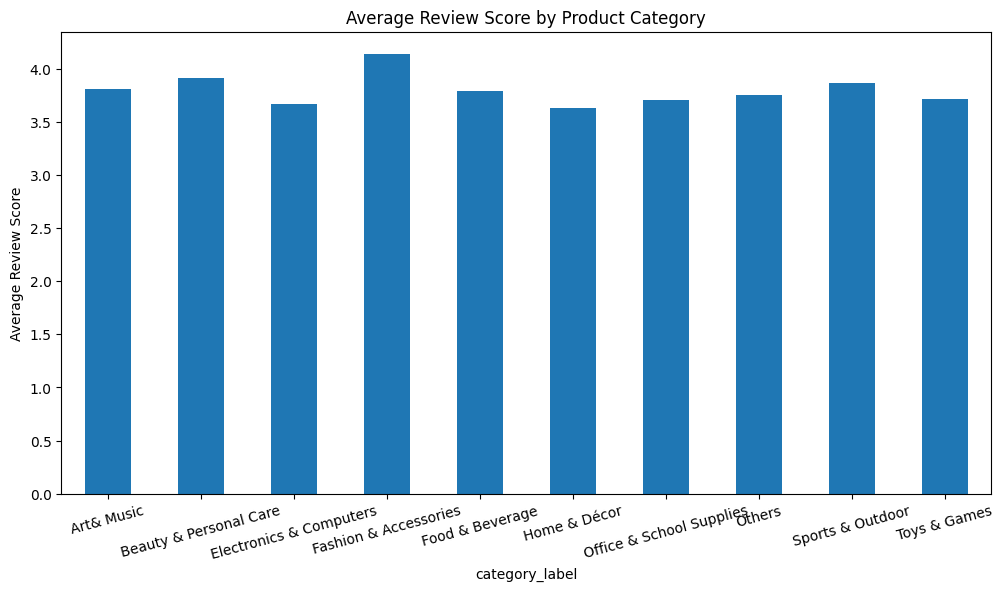

In [19]:
# Review score of each product category
# Group by product category and calculate mean review score
category_scores = Reviews.groupby('category_label')['review_score'].mean()

# Visualize the results using a bar chart
category_scores.plot(kind='bar', figsize=(12,6), rot=15, ylabel='Average Review Score', title='Average Review Score by Product Category')
plt.show()

In [20]:
# Review title of each category
# Group by product category and extract most common review title
category_titles = Reviews.groupby('category_label')['review_comment_title'].agg(lambda x:x.value_counts().index[0])
category_titles

category_label
Art& Music                  super recomendo
Beauty & Personal Care            Recomendo
Electronics & Computers           Recomendo
Fashion & Accessories                   Bom
Food & Beverage                   Recomendo
Home & Décor                      Recomendo
Office & School Supplies          Recomendo
Others                            Recomendo
Sports & Outdoor                  recomendo
Toys & Games                      recomendo
Name: review_comment_title, dtype: object

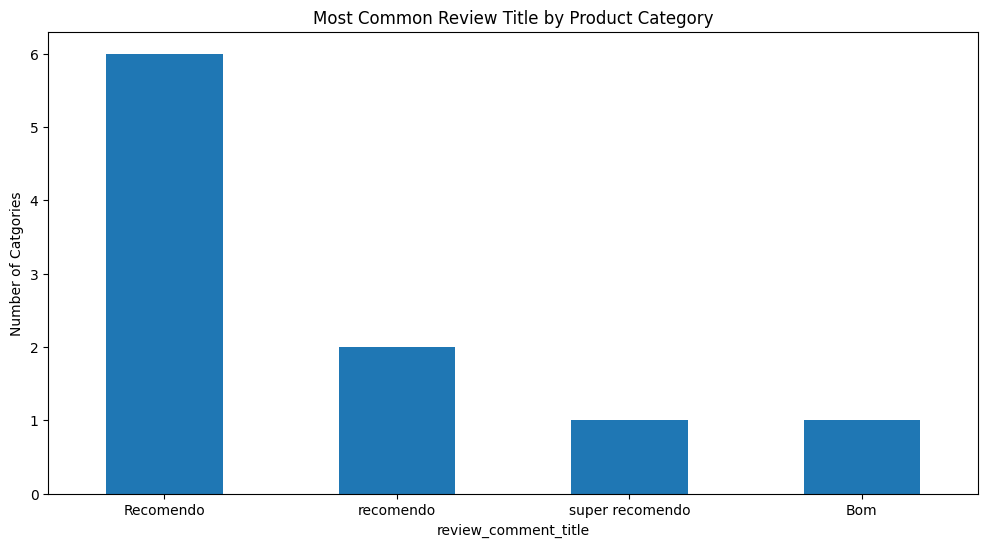

In [21]:
# Visualize the results using a bar chart
category_titles.value_counts().plot(kind='bar', figsize=(12,6), rot=0, ylabel='Number of Catgories', title='Most Common Review Title by Product Category')
plt.show()

In [22]:
# Time between reviews created and answered
# Calculate time difference between review creation and answer timestamps
Reviews['time_diff_days'] = (pd.to_datetime(Reviews['review_answer_timestamp']) - pd.to_datetime(Reviews['review_creation_date'])).dt.days + (pd.to_datetime(Reviews['review_answer_timestamp']) - pd.to_datetime(Reviews['review_creation_date'])).dt.seconds / 86400

# Round the time difference to one decimal place
Reviews['time_diff_days'] = Reviews['time_diff_days'].round(2)
Reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name_english,category_label,time_diff_days
7,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,a76bb75d78ce6aa4a5202051b4f88a83,sports_leisure,Sports & Outdoor,2.78
26,707879ba994360a7805bdda512738e6d,d08bba6d656adbdc54eaf30b29532e89,1,Entrega faltando,Comprei dois produtos na loja só veio um. É no...,2018-07-21 00:00:00,2018-07-24 07:31:37,6dae4e6bc334685708571a48aa41d437,sports_leisure,Sports & Outdoor,3.31
27,61cd6b47a7c54cf93806138ec393260c,b0fac27c81315d7201a0ca455f58304d,4,Recebi o produto no prazo,Entregue no prazo.,2018-08-15 00:00:00,2018-08-16 02:43:55,6dae4e6bc334685708571a48aa41d437,sports_leisure,Sports & Outdoor,1.11
40,430a1e8f51ceca3105e85821f78bde79,608423eb49f078b0c2095dbdbe03c210,1,Não recomendo,O produto chegou sem problemas. Mas ele não é ...,2018-04-25 00:00:00,2018-04-29 15:09:41,45b280868bcc8124d9309f459a42eeaf,sports_leisure,Sports & Outdoor,4.63
48,6f96de0b0526fd16fcdc0e372aef7402,147941b96e61a2e7c02be8bf27b4cca1,5,Excelente,"Produto de ótima qualidade, entrega rápida.",2018-06-21 00:00:00,2018-06-21 22:52:17,5113c9a5037013b0a750444df6dec60f,sports_leisure,Sports & Outdoor,0.95
...,...,...,...,...,...,...,...,...,...,...,...
110739,012902a4690846e0d3e1cb3a950a1bd0,cc9760bf7b5d5b74c4d1eb1ab6405b50,1,Produto ainda não chegou,Recebi um pacote com apenas um item do que com...,2018-07-24 00:00:00,2018-08-16 15:39:00,54b391a91c3b1a1e22af86434155834d,arts_and_craftmanship,Art& Music,23.65
110742,a6a6d2f97b28e8aca22046635855fe63,edcf1e1eeb52381be9388c90152be52d,5,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30,6bb18295cc019bf3b6dc7c773411d530,arts_and_craftmanship,Art& Music,2.70
110743,1416283e258fc5cd87d9d326148cad5e,99496f27b38d83724e8dea944a320b44,5,Otimo,"Muito rapida a entrega ,perfeito",2018-07-26 00:00:00,2018-07-26 21:31:57,189d6b9a380642d0ee2245277cc9b2f2,arts_and_craftmanship,Art& Music,0.90
110745,ad0de1dda4fa03e8efb68c481b31ebf8,2ef4a11b6e24fdfbb43b92cb5f95edff,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship,Art& Music,6.08


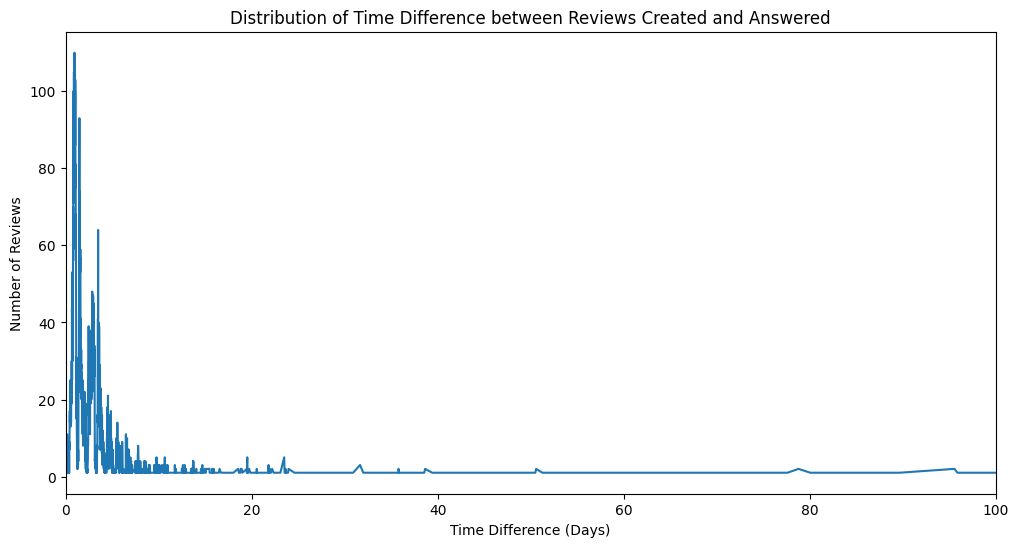

In [23]:
# Create a line chart of the time difference
Reviews['time_diff_days'].value_counts().sort_index().plot(figsize=(12,6), xlabel='Time Difference (Days)', ylabel='Number of Reviews', title='Distribution of Time Difference between Reviews Created and Answered', xlim=[0, 100])
plt.show()

<Axes: title={'center': 'Relationship between Review Score and Review Sentiment'}, xlabel='Review Score', ylabel='Review Sentiment'>

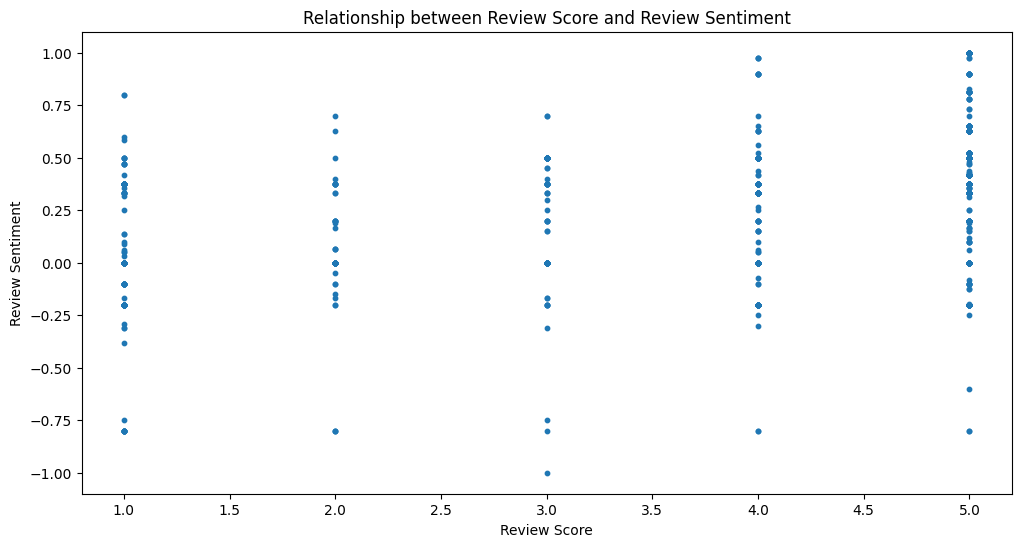

In [24]:
# Relationship between review score and review message contents
# Apply sentiment analysis to review comment messages
Reviews['review_sentiment'] = Reviews['review_comment_message'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize the results using a scatter plot
Reviews.plot(kind='scatter', x='review_score', y='review_sentiment', figsize=(12,6), s=10, xlabel='Review Score', ylabel='Review Sentiment', title='Relationship between Review Score and Review Sentiment')

In [25]:
# Top Product ID of Each Product Category Based on Review Scores
category_top_products = Reviews.groupby('category_label').apply(
    lambda x: x.sort_values(by='review_score', ascending=False)['product_id'].head(1)).reset_index()
category_top_products.columns = ['category_label', 'count', 'product_id']
category_top_products

,category_label,count,product_id
0,Art& Music,95337,05a9ab81472f6bdcd910cb49b636c5b5
1,Beauty & Personal Care,37165,c56ecdd06c754c22fc5c5245d9502e30
2,Electronics & Computers,110570,34dabb8af33b3756cf72df05fb327011
3,Fashion & Accessories,81585,89e4362d74afa10ac57f8d67210132a6
4,Food & Beverage,107937,89321f94e35fc6d7903d36f74e351d40
5,Home & Décor,20847,47ae44a186225b8a87ebb7bf39cc1444
6,Office & School Supplies,96005,177d3d5bb9d4d29222a222e3b3554f41
7,Others,46816,c8b96022819f31119f1404ad2c3c1059
8,Sports & Outdoor,8384,0075c14603d80515e20908c156ceb47b
9,Toys & Games,71322,d3e38ef1760a26d888e58942e16b0a70


In [26]:
# Top Products and Top Categories with the Most Good Reviews
# Filter the dataset by review score
good_reviews = Reviews[Reviews['review_score'] >= 4]

# Group by product ID and product category and count the reviews
top_products = good_reviews.groupby(['product_id', 'category_label'])['review_id'].count().sort_values(ascending=False).head(10).reset_index()
top_products.columns = ['product_id', 'category_label', 'Count']
top_categories = good_reviews.groupby('category_label')['review_id'].count().sort_values(ascending=False).head(10).reset_index(name='Count')
top_products, top_categories

(                         product_id           category_label  Count
 0  53b36df67ebb7c41585e8d54d6772e08             Toys & Games     52
 1  19c91ef95d509ea33eda93495c4d3481   Beauty & Personal Care     45
 2  422879e10f46682990de24d770e7f83d         Sports & Outdoor     36
 3  3fbc0ef745950c7932d5f2a446189725   Beauty & Personal Care     33
 4  d1c427060a0f73f6b889a5c7c61f2ac4  Electronics & Computers     33
 5  3dd2a17168ec895c781a9191c1e95ad7  Electronics & Computers     32
 6  368c6c730842d78016ad823897a372db         Sports & Outdoor     31
 7  aca2eb7d00ea1a7b8ebd4e68314663af             Home & Décor     28
 8  389d119b48cf3043d311335e499d9c6b         Sports & Outdoor     24
 9  99a4788cb24856965c36a24e339b6058             Home & Décor     24,
              category_label  Count
 0              Home & Décor   2297
 1          Sports & Outdoor   1182
 2   Electronics & Computers   1034
 3    Beauty & Personal Care   1007
 4              Toys & Games    794
 5                    Ot

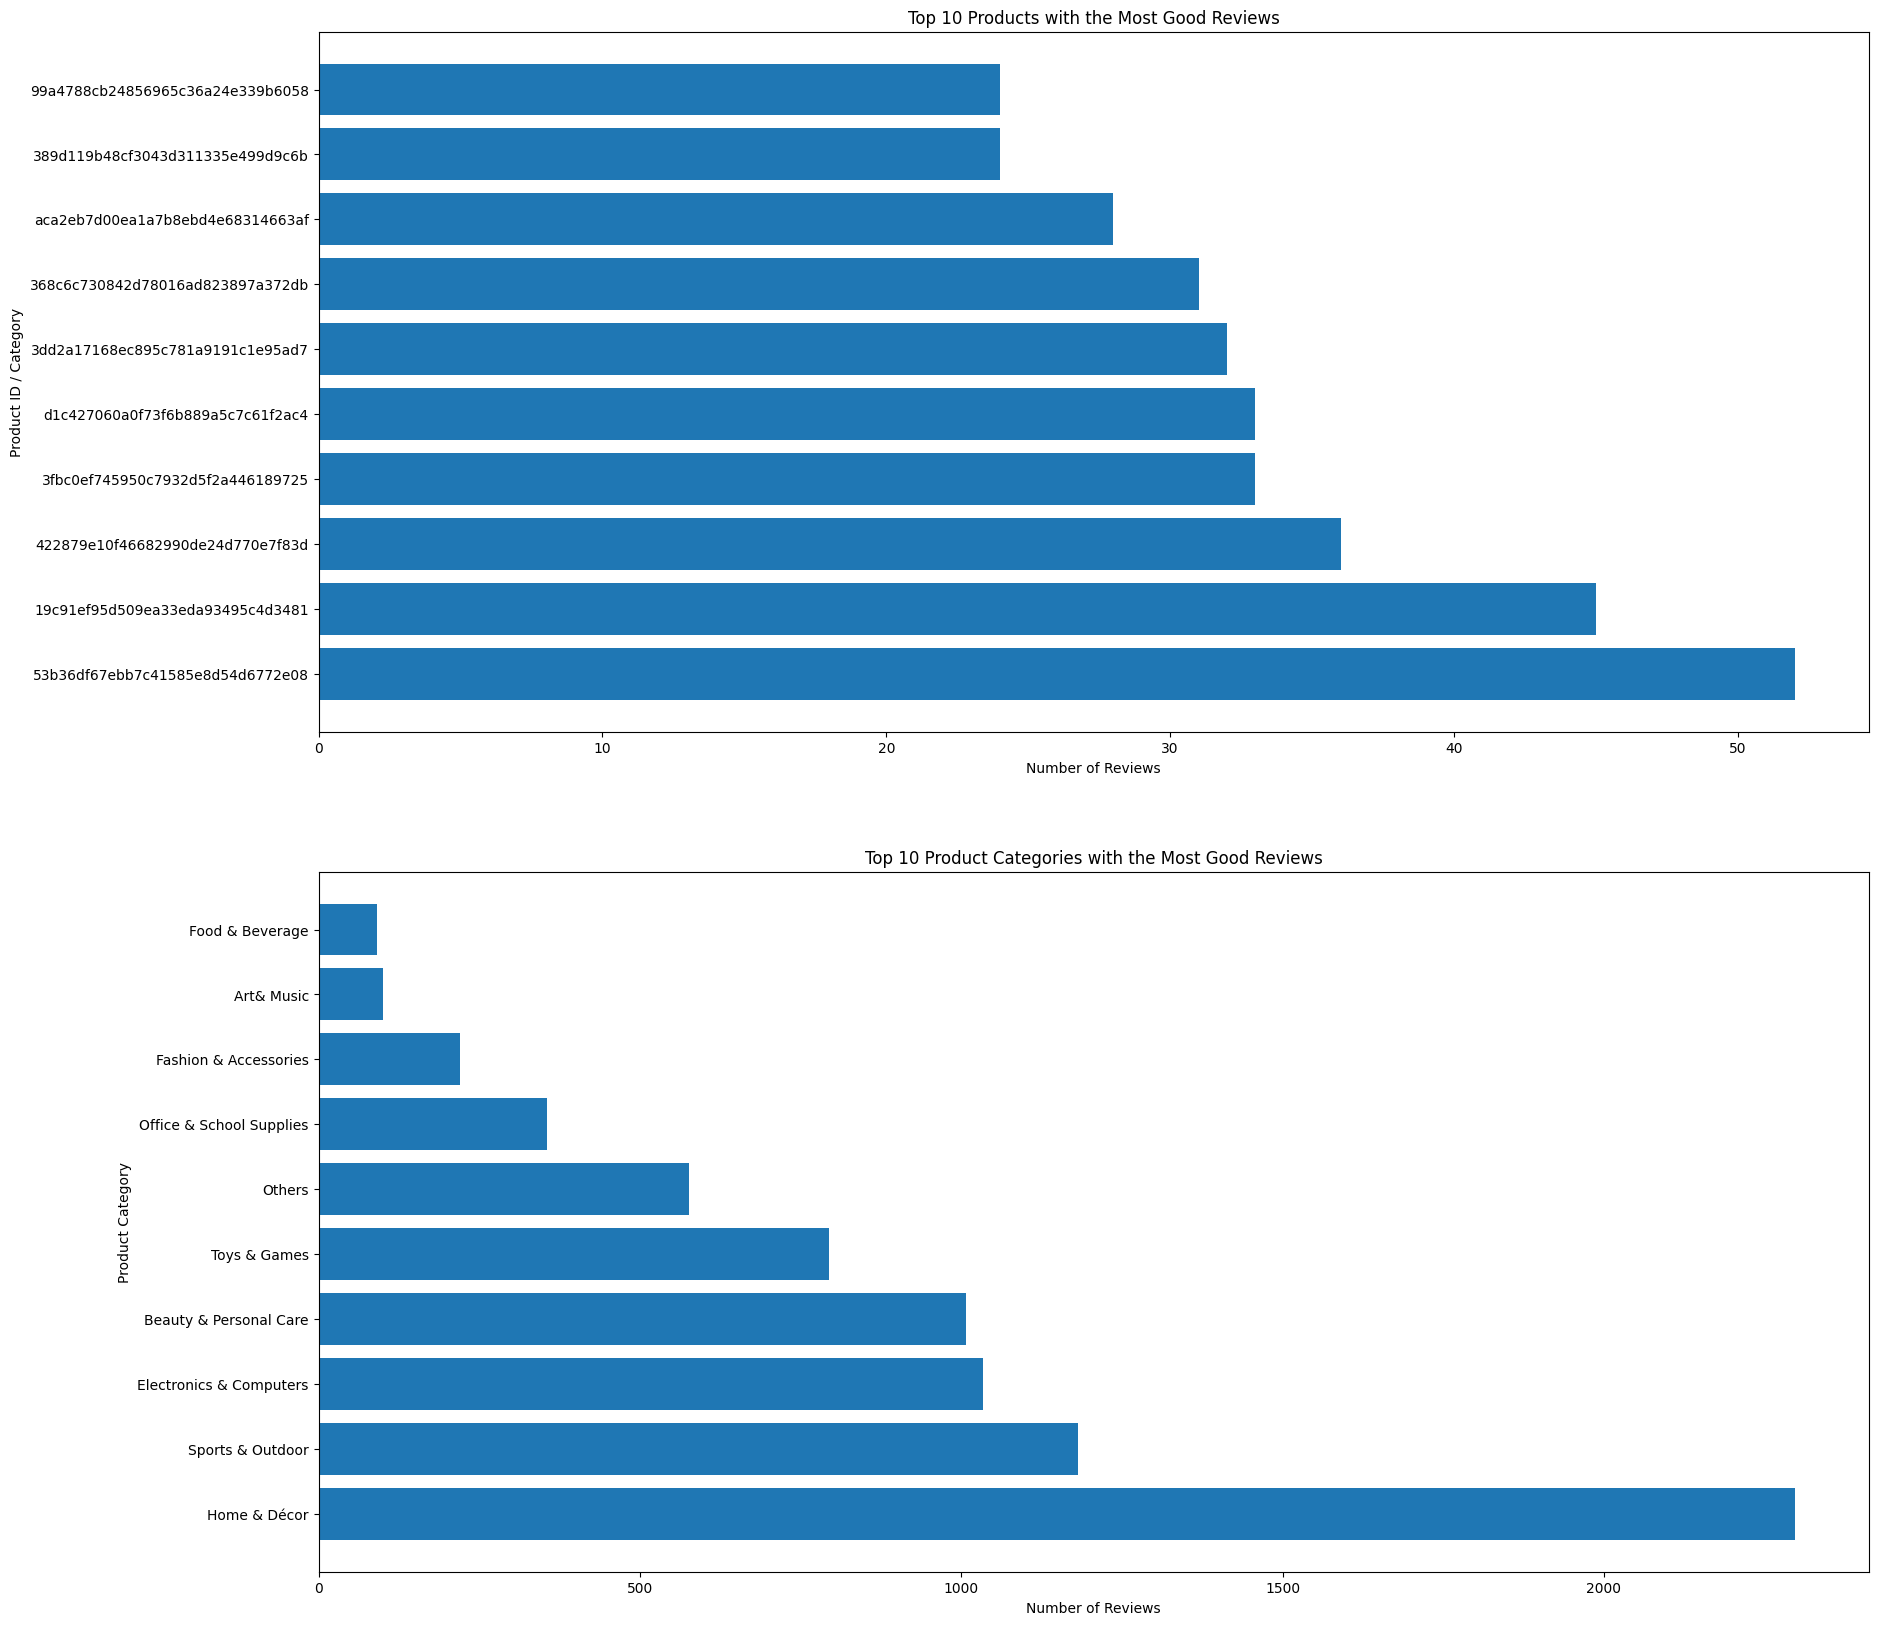

In [27]:
# Visualize the results using two horizontal bar charts
fig, axs = plt.subplots(2, 1, figsize=(20,20))
axs[0].barh(top_products.product_id, top_products.Count)
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Product ID / Category')
axs[0].set_title('Top 10 Products with the Most Good Reviews')
axs[1].barh(top_categories.category_label, top_categories.Count)
axs[1].set_xlabel('Number of Reviews')
axs[1].set_ylabel('Product Category')
axs[1].set_title('Top 10 Product Categories with the Most Good Reviews')
plt.show()

In [28]:
# Use order_id to get the orders with multiple reviews and analysis the multiple reviews for one order
order_review_counts = Reviews.groupby('order_id')['review_id'].count().reset_index(name='Count')
order_review_counts.Count.value_counts()

Count
1     8477
2      924
3      163
4       54
6       34
5       27
7        6
12       2
13       1
11       1
Name: count, dtype: int64

In [29]:
# Empty list to store dataframes
dfs = []

# Filter the orders with multiple reviews
multi_review_orders = order_review_counts[order_review_counts.Count > 5].order_id

# Analyze the reviews for each order separately and append dataframes to list
for order_id in multi_review_orders:
    order_reviews = Reviews[Reviews['order_id'] == order_id]
    order_analysis = {
        'Order ID': order_id,
        'Number of Reviews': len(order_reviews),
        'Average Review Score': order_reviews['review_score'].mean()
    }
    order_df = pd.DataFrame(order_analysis, index=[0])
    dfs.append(order_df)
    
# Concatenate dataframes in the list into a single dataframe and display it
multi_review_orders_df = pd.concat(dfs, ignore_index=True)
multi_review_orders_df = multi_review_orders_df.sort_values(by='Number of Reviews', ascending=False)
multi_review_orders_df

,Order ID,Number of Reviews,Average Review Score
13,37ee401157a3a0b28c9c6d0ed8c3b24b,13,3.0
22,637617b3ffe9e2f7a2411243829226d0,12,4.0
30,af822dacd6f5cff7376413c03a388bb7,12,1.0
23,6c355e2913545fa6f72c40cbca57729e,11,4.0
39,e332eda82fe7ca4e86daf4f71ca785df,7,1.0
38,df13cbaf3230c62a4b582317936e8a39,7,1.0
1,0c82a229fc22597c2361656cba8d3230,7,5.0
25,7d8f5bfd5aff648220374a2df62e84d5,7,5.0
5,1c437b4d4326d36b71e91dd7a7c2c4f6,7,1.0
17,487e6e67e10e5756f886f5994439c22f,7,3.0
